In [1]:
import tensorflow as tf 
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/FireDataset/Datasets 1-2')

In [4]:
TRAIN_DIR = 'Training'
VALIDATION_DIR = 'Validation'

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 64
)


validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 16
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [7]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(128, (11, 11), strides = (4, 4), activation = 'relu', input_shape = (224, 224, 3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides = (2, 2)),
                                    tf.keras.layers.Conv2D(256, (5, 5), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
                                    tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(2048, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(1024, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.0001),
              metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 128)       46592     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         2457984   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 15
)

Epoch 1/50
15/15 [==============================] - 445s 30s/step - loss: 0.5095 - acc: 0.6900 - val_loss: 0.4076 - val_acc: 0.8452
Epoch 2/50
15/15 [==============================] - 34s 2s/step - loss: 0.3576 - acc: 0.8559 - val_loss: 0.3148 - val_acc: 0.8745
Epoch 3/50
15/15 [==============================] - 33s 2s/step - loss: 0.2885 - acc: 0.8886 - val_loss: 0.4175 - val_acc: 0.8410
Epoch 4/50
15/15 [==============================] - 36s 2s/step - loss: 0.3094 - acc: 0.8854 - val_loss: 0.2510 - val_acc: 0.9289
Epoch 5/50
15/15 [==============================] - 35s 2s/step - loss: 0.2561 - acc: 0.9039 - val_loss: 0.2277 - val_acc: 0.9289
Epoch 6/50
15/15 [==============================] - 35s 2s/step - loss: 0.2034 - acc: 0.9323 - val_loss: 0.2084 - val_acc: 0.9414
Epoch 7/50
15/15 [==============================] - 35s 2s/step - loss: 0.1947 - acc: 0.9225 - val_loss: 0.2550 - val_acc: 0.9331
Epoch 8/50
15/15 [==============================] - 35s 2s/step - loss: 0.2229 - acc: 0.

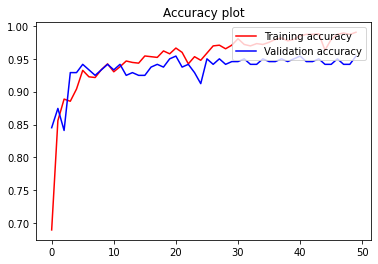

<Figure size 432x288 with 0 Axes>

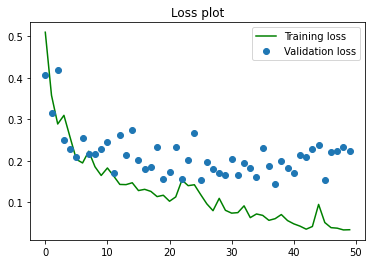

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Accuracy plot')

plt.legend(loc = 1)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'o', label = 'Validation loss')
plt.title('Loss plot')

plt.legend(loc = 1)
plt.figure()
plt.show()

In [12]:
os.getcwd()

'/content/drive/My Drive/FireDataset/Datasets 1-2'

In [14]:
os.chdir('/content/')

In [15]:
os.getcwd()

'/content'

In [17]:
#Applying the prediction on any random image

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
# print(uploaded.keys())
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))  # 0 for a fire detected

Saving 6.jpg to 6.jpg
True 0.99799687
